<a href="https://colab.research.google.com/github/cammylexi/CS2341-Assignment-3/blob/main/Lab3Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

The goal of this lab is to develop a machine learning model to classify ships based on 4 multi-class classification tasks using Ship Performance Dataset. The tasks include predicting the Ship Type, Route Type, and Maintenance Status based on numerical and catergorical features [1]. With these tasks we can help optimize fleet operations, improve cost efficiency, and ensure regulatory compliance in maritime industry.  

<br>

 ### Task and Use Case: Predicting Ship Type

 The different ships are classified as Tanker, Container Ship, Fish Carrier, and Bulk Carrier [1]. This can help with fleet optimizations because if different ship types are suited for different cargo and routes, so classification and help with making good operational decisions. In addition to managing cost takes understanding of the type of ship and all that it needs like the type of fuel engine effiencieny and operational cost.

 Interested Parties
- Shipping companies & Maritime logistics firms would be interested because it would allow them to optimize shipping routes, fuel, and cargo handling based off of the ship's capabilities.


<br>

### Task and Use Case: Predicting Route Type

The ship's route is classified into Short-haul, Long-haul, or Transoceanic which is based on operational characteristics such as speed, engine power and fuel usage [1]. Different route have varying fuel costs, risks and operational constraints. The risk on the route would be accessed based on the on the weather and maintainence. Usually, longer routes leave ships exposed to harsher weather condition and higher maintenance needs. If shipping companies know the route type that is taken, the model can help them optimize voyage planning to planning reduce cost and improve efficiency.

Interested Parties
- Maritime insurance companies would be interested in this model to assess the risk of the voyage and adjust the insurance policies accordingly.
- Shipping companies would also be benefit from this because they would be able to make informed decisions about fuel cost and operational risks.


<br>

### Task and Use Case: Predicting Maintainence Status



A ship's maintenance condition is Fair, Critical, or Good and can be classifed using data on the engine performance, distance traveled, and fuel efficiency [1]. Sometimes during voyage unexpected breakdowns happen and can be costly, which can lead to delays, lost in revenue, and even safety risks. A predictive maintainence model allows compaines to schedule repairs before failures occur and to avoid unnecessary expenses.

Interested Parties
-  Shipowners and Fleet managers would benefit from this so they can proactively schedule maintainance and reduce unexpected repair cost.
- Maritime Insurance Companies would use this to assess risk based maintainence conditions and adjust insurance coverage.



<br>

### Task and Use Case: Predicticing Engine Type


A engine type is classified as  Diesel, Heavy Fuel Oil, and Stream Turbine which will be based on the characteristics of operation, revenue, and performance. This can help understand figure out the logistics as to the which fuel is efficent for which Engine Type, because of their varying fuel consumption rates. By predicting engine type, shipping companies can optimize fuel purchases and reduce operational costs. Maintain planning can also be determined by the engine type as some engines may need frequeny maintenance than others.


Interested Parties
-  Shipowners & Fleet operators would be interested because choosing the right engine for a ship's purpose can reduce the fuel expense during travel and prevent costly repairs. They can use the model to effectively save money of repairs and maintenance.  






<br>

These classifications are important to provide insight for decision-making for shipping companies. The Ship Type, Engine Type, Route Type models are more suitable for offline analysis, because over time logistics teams can analyze patterns from past voyages and improve route planning for the next shipping. On the other hand, Maintainence Status can be deployed for real-time predictions, because the classification would come immediately to the fleet manager to take action.

In order for these models to be useful they must give a high precision and recall of at least 90%, especially for the Maintainance Status prediction [1]. In the case, a false negative occurs -- where a "Fair" condition is called instead of "Critical" -- could lead to serious safety issues and high expenses.



---
##Reference

[1]F. J. Adekunle, “Ship Performance Clustering Dataset,” Kaggle.com, 2025, doi: https://doi.org/10417255/69f3824353e7a0bbb9f303a4474ecbe2.
‌








#Data Preparation and Preprocessing

## Defining Class Variables

###Numerical Features (Continuous Variables)
- Speed_Over_Ground_knots (float): Average speed of the ship over water (in knots).

- Engine_Power_kW (float): Engine power output (in kilowatts).
Distance_Traveled_nm (float): Total distance traveled by the ship (in nautical miles).

- Cargo_Weight_tons (float): Total weight carried by the ship (in tons).

- Operational_Cost_USD (float): Total operational cost per voyage (in USD).

- Revenue_per_Voyage_USD (float): Revenue generated per voyage (in USD).

- Efficiency_nm_per_kWh (float): Energy efficiency calculated in nautical miles per kilowatt-hour.

###Categorical Features (Discrete Variables)
- Ship_Type (categorical): Type of ship (e.g., Tanker, Container Ship, Fish Carrier, Bulk Carrier).

- Route_Type (categorical -> integer encoding {0, 1, 2, 3, 4}): Shipping route type (e.g., Short-haul, Long-haul, Transoceanic).

- Engine_Type (categorical): Type of engine (e.g., Diesel, Heavy Fuel Oil).

- Maintenance_Status (categorical -> ordinal encoding {3:Good, 2:Fair, 1:Critical, NaN:None}): Maintenance condition of the ship (e.g., Fair, Critical, Good).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

#this is our data at this link "https://github.com/LLANES-MA/MLPythonLab1"
df = pd.read_csv('https://raw.githubusercontent.com/LLANES-MA/MLPythonLab1/refs/heads/main/Ship_Performance_Dataset.csv')

# Removed unnecessary variables
for col in ['Date','Draft_meters','Turnaround_Time_hours', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']:
    if col in df:
        del df[col]

df.head()

Pandas: 2.2.2
Numpy: 1.26.4


,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Efficiency_nm_per_kWh
0,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,Moderate,1959.017882,483832.354540,292183.273104,1.455179
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,Rough,162.394712,483388.000509,883765.787360,0.290361
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,Moderate,178.040917,448543.404044,394018.746904,0.499595
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,Moderate,1737.385346,261349.605449,87551.375175,0.702906
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,Moderate,260.595103,287718.375160,676121.459632,1.331343


##Removed Variables

Date:

- The date variable was removed from the datasets because the patterns that we are focusing on is not meaningful to our model.

Draft_Meters:

- This variable is not important to our dataset because the navigation in shallow waters is not directly tied to any of the 4 predicting classifications.

Turnaround_Time_hours:

- Turnaroung time shows the port efficiency rather than ship performance characteristics. Since this metric is more relevant for port operations than predicting the ship's core attritubes it was excluded.  
  
Seasonal_Impact_Score:

- Seasons do change with the conditions of the weather that impacts the voyage in many ways. However, since we have included weather in our data there is not need to have seasonal impact score.

Weekly_Voyage_Count:

- This variable display operational frequency, when this data needs more specific techncial and operational data than just a count.
   
Average_Load_Percentage:

- Since this variable correlates with cargo weight and is already included in the dataset it was removed to reduce redundancy.


In [ ]:
#first let us change the numeric values, where appropriate, to numeric using the .map() function
df['Ship_Type'] = df['Ship_Type'].astype('category').cat.codes
df['Route_Type'] = df['Route_Type'].astype('category').cat.codes
df['Engine_Type'] = df['Engine_Type'].astype('category').cat.codes
df['Maintenance_Status'] = df['Maintenance_Status'].astype('category').cat.codes
df['Weather_Condition'] = df['Weather_Condition'].astype('category').cat.codes

df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Efficiency_nm_per_kWh
0,1,-1,1,0,12.597558,2062.983982,1030.943616,1,1959.017882,483832.354540,292183.273104,1.455179
1,2,2,2,2,10.387580,1796.057415,1060.486382,2,162.394712,483388.000509,883765.787360,0.290361
2,1,1,0,1,20.749747,1648.556685,658.874144,1,178.040917,448543.404044,394018.746904,0.499595
3,0,3,2,1,21.055102,915.261795,1126.822519,1,1737.385346,261349.605449,87551.375175,0.702906
4,2,3,0,1,13.742777,1089.721803,1445.281159,1,260.595103,287718.375160,676121.459632,1.331343


Data Quality (After handling missing data)

In [ ]:
# Elimating: ship_type, engine_type, route_type
# Impute: maintenance status, weather conditions
df_grouped = df.groupby(by='Ship_Type')

import math
# Code originally written and revised from Dr. Larson
func = lambda grp: grp.fillna(int(grp.median())) # within groups, fill using median (define function to do this)
numeric_columns = ['Maintenance_Status', 'Weather_Condition'] # only transform numeric columns
df_imputed = df_grouped[numeric_columns].transform(func) # apply impute and transform the data back

# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_imputed.columns)) # in case the median operation deleted columns
df_imputed[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_imputed.dropna(inplace=True)

# Rearrange the columns
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maintenance_Status       2736 non-null   int8   
 1   Weather_Condition        2736 non-null   int8   
 2   Speed_Over_Ground_knots  2736 non-null   float64
 3   Distance_Traveled_nm     2736 non-null   float64
 4   Ship_Type                2736 non-null   int8   
 5   Operational_Cost_USD     2736 non-null   float64
 6   Engine_Type              2736 non-null   int8   
 7   Efficiency_nm_per_kWh    2736 non-null   float64
 8   Revenue_per_Voyage_USD   2736 non-null   float64
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Engine_Power_kW          2736 non-null   float64
 11  Route_Type               2736 non-null   int8   
dtypes: float64(7), int8(5)
memory usage: 163.1 KB


## Final Dataset
Each attribute in the dataset contributes to classification of Ship Type, Route Type, Engine Type and Maintenance Status.

Operational Efficiency:

- By examining Speed_Over_Ground_knots, Efficiency_nm_per_kWh, and Engine_Power_kW,Distance_Traveled_nm, Cargo_Weight_tons provides insight into the ship's performance.

Economic Viability
- Through Operational_Cost_USD and Revenue_per_Voyage_USD we can observe the cost-efficiency .

Predictive Modeling:
- Ship_Type, Route_Type, and Engine_Type are key categorical features for classification tasks and useful as predictors in certain models.

Risk Assessment
- Based on Maintenance_Status and Weather_Condition, which helps determine potential breakdown and natural risks.

##After Preprocessed Data

In [ ]:
df_imputed.describe()

,Maintenance_Status,Weather_Condition,Speed_Over_Ground_knots,Distance_Traveled_nm,Ship_Type,Operational_Cost_USD,Engine_Type,Efficiency_nm_per_kWh,Revenue_per_Voyage_USD,Cargo_Weight_tons,Engine_Power_kW,Route_Type
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,0.905336,0.872442,17.602863,1036.406203,1.364766,255143.344488,0.887061,0.798656,521362.062011,1032.573264,1757.610939,1.358187
std,0.907511,0.898604,4.311979,568.632080,1.220478,140890.482189,0.908240,0.403590,271211.625499,558.697499,717.002777,1.212515
min,-1.000000,-1.000000,10.009756,50.433150,-1.000000,10092.306318,-1.000000,0.100211,50351.814447,50.229624,501.025220,-1.000000
25%,0.000000,0.000000,13.928452,548.511573,0.000000,131293.378767,0.000000,0.463592,290346.388017,553.983629,1148.104914,0.000000
50%,1.000000,1.000000,17.713757,1037.816060,1.000000,257157.653226,1.000000,0.789877,520176.931762,1043.207497,1757.494344,1.000000
75%,2.000000,2.000000,21.284785,1540.934161,2.000000,381796.930499,2.000000,1.147426,750072.791216,1527.722391,2382.594292,2.000000
max,2.000000,2.000000,24.997043,1998.337057,3.000000,499734.867868,2.000000,1.499259,999916.696140,1999.126697,2998.734329,3.000000


##Splitting the Data

Several organizations have had the same question: "What is the most efficient test/train split?" In class most of what we have been doing has been 80/20, but we decided to research more into the benefit of such a split and why we might not want to do that. A paper published in 2024 studied the benefit of several different split ratios on medical image data, where classification was the most important. They ranged from 50:50 to 95:05. Their conclusion was that the most efficient datasets of course varied by size, but with larger datasets (greater than 50,000 datapoints) it was more efficient to run a 60:40 ratio, letting 60% of the data be training and 40% be testing. Our dataset is much smaller, only 2300 datapoints, and another part of their study agreed that for datasets less than 5000, it was avtually the most beneficfial to run a 95:05 split `[1]`. In doing so, the dataset allowed for maximum training on as much data as possible, and then could analyze the leftover data with pinpoint accuracy. In order to keep with the idea they set forth, we decided to opt for a 95:05 split.

------------------------------------------------------------------------------
https://pmc.ncbi.nlm.nih.gov/articles/PMC11419616/

In [ ]:
from sklearn.model_selection import train_test_split

def oneVsAll(df, target):
  if not isinstance(target, str):
    exit()

  # Define features (X) and target variable (y)
  X = df.drop(columns=[target])
  y = df[target]

  # Perform train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y)

  print(f"Split for variable - {target}")
  print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
  print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
  print("====================================================================")

  return X_train, X_test, y_train, y_test

Since we are doing multiple series of classification, we decided to make a function so that we can apply this code for all of our one vs all classifications.

In [ ]:
shp_train, shp_test, shp_y_train, shp_y_test = oneVsAll(df_imputed, 'Ship_Type')
rte_train, rte_test, rte_y_train, rte_y_test = oneVsAll(df_imputed, 'Route_Type')
eng_train, eng_test, eng_y_train, eng_y_test = oneVsAll(df_imputed, 'Engine_Type')
mtn_train, mtn_test, mtn_y_train, mtn_y_test = oneVsAll(df_imputed, 'Maintenance_Status')

Split for variable - Ship_Type
X_train shape: (136, 11), y_train shape: (136,)
X_test shape: (2600, 11), y_test shape: (2600,)
Split for variable - Route_Type
X_train shape: (136, 11), y_train shape: (136,)
X_test shape: (2600, 11), y_test shape: (2600,)
Split for variable - Engine_Type
X_train shape: (136, 11), y_train shape: (136,)
X_test shape: (2600, 11), y_test shape: (2600,)
Split for variable - Maintenance_Status
X_train shape: (136, 11), y_train shape: (136,)
X_test shape: (2600, 11), y_test shape: (2600,)


#Modeling

##One vs All Logistic Regression Classifier

Logistic Regression from Colab 05. This code combines all of the previous logistic regression classes into one class. It also adds the functionality to call several different parameters including solver, penalty, and C (cost).

In [ ]:
import numpy as np
from scipy.special import expit
from sklearn.base import BaseEstimator

class LogisticRegression(BaseEstimator):
    def __init__(self, eta=0.1, iterations=20, solver="steepest", penalty="none", C=1.0):
        """Ensure that all parameters are directly assigned without modification."""
        self.eta = eta
        self.iterations = iterations
        self.solver = solver  # Store directly without modifying
        self.penalty = penalty  # Store directly without modifying
        self.C = C

    def __str__(self):
        return f"Logistic Regression (solver={self.solver}, penalty={self.penalty}, C={self.C})"

    def get_params(self, deep=True):
        """Returns hyperparameters for compatibility with scikit-learn."""
        return {"eta": self.eta, "iterations": self.iterations, "solver": self.solver, "penalty": self.penalty, "C": self.C}

    def set_params(self, **params):
        """Sets hyperparameters properly for scikit-learn compatibility."""
        for key, value in params.items():
            setattr(self, key, value)
        return self

    @property
    def coef_(self):
        return self.w_[:, 1:] if hasattr(self, 'w_') else None

    @property
    def intercept_(self):
        return self.w_[:, 0] if hasattr(self, 'w_') else None

    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    @staticmethod
    def _sigmoid(z):
        return expit(z)

    def _compute_gradient(self, X, y, weights):
      X = np.array(X)  # Ensure X is a NumPy array
      y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector
      y_pred = self._sigmoid(X @ weights).reshape(-1, 1)  # Ensure matrix multiplication works
      error = y - y_pred # Reshape y_pred to align with y

      gradient = X.T @ error / len(y)

      # Apply Regularization (excluding bias term)
      if self.penalty.lower() == "l2":
        reg_weights = np.copy(weights)
        reg_weights[0] = 0  # Don't regularize the bias
        gradient -= (1 / self.C) * reg_weights
      elif self.penalty.lower() == "l1":
        reg_weights = np.copy(weights)
        reg_weights[0] = 0  # Don't regularize the bias
        gradient -= (1 / self.C) * np.sign(reg_weights)
      elif self.penalty.lower() == "elasticnet":
          reg_weights = np.copy(weights)
          reg_weights[0] = 0  # Don't regularize the bias
          gradient -= (1 / self.C) * (0.5 * reg_weights + 0.5 * np.sign(reg_weights))

      return gradient


    def _train_binary(self, X, y):
      """Train a binary logistic regression model."""
      # Add intercept term
      Xb = self._add_intercept(np.array(X, dtype=np.float64))

      # Convert y to appropriate shape
      y = np.array(y, dtype=np.float64).reshape(-1, 1)

      # Initialize weights
      weights = np.zeros((Xb.shape[1], 1))

      # Training loop
      for _ in range(self.iterations):
        if self.solver.lower() == "steepest":
          weights += self.eta * self._compute_gradient(Xb, y, weights)
        elif self.solver.lower() == "stochastic":
          for i in np.random.permutation(len(y)):
            xi, yi = Xb[i:i+1], y[i]
            y_pred = self._sigmoid(xi @ weights)
            gradient = (yi - y_pred) * xi.T
            weights += self.eta * gradient
        elif self.solver.lower() == "newton":
            y_pred = self._sigmoid(Xb @ weights)
            W = np.diagflat(y_pred * (1 - y_pred))
            Hessian = Xb.T @ W @ Xb
            gradient = self._compute_gradient(Xb, y, weights)
            if np.linalg.det(Hessian) != 0:
              weights += self.eta * np.linalg.inv(Hessian) @ gradient

      return weights

    def fit(self, X, y):
        self.unique_ = np.unique(y)
        num_classes = len(self.unique_)
        num_features = X.shape[1] + 1
        self.w_ = np.zeros((num_classes, num_features))

        for i, cls in enumerate(self.unique_):
            y_binary = (y == cls).astype(int)
            class_weights = self._train_binary(X, y_binary)
            self.w_[i, :] = class_weights.ravel()

        return self

    def predict_proba(self, X):
        Xb = self._add_intercept(X)
        return self._sigmoid(Xb @ self.w_.T)

    def predict(self, X):
        return self.unique_[np.argmax(self.predict_proba(X), axis=1)]


##Training Classifier

We are going to train our new classifier for each of our classes in order to achieve the best performance on our test data set. Our first step will be optimizing our hyperparameters. From there we can move on to visualizing the performance of the classifier versus the parameters we investigated.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import time

def optimize_logistic_regression(X_train, X_test, y_train, y_test, eta=0.1, iterations=100):
    """
    Optimizes a one-vs-all logistic regression classifier using cross-validation.

    :param X_train: Training features
    :param X_test: Test features
    :param y_train: Training labels
    :param y_test: Test labels
    :param eta: Learning rate (default: 0.1)
    :param iterations: Number of iterations (default: 100)
    :return: Best trained logistic regression model
    """
    solvers = ["steepest", "stochastic", "newton"]
    penalties = ["none", "l1", "l2", "elasticnet"]
    C_values = [0.01, 0.1, 1, 10, 100]

    best_score = 0
    best_params = {}

    results = {}

    for solver in solvers:
        for penalty in penalties:
            for C in C_values:
                model = LogisticRegression(eta=eta, iterations=iterations, solver=solver, penalty=penalty, C=C)

                # Perform cross-validation (5-fold)
                scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
                avg_score = np.mean(scores)

                # Store best model based on validation accuracy
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = {"solver": solver, "penalty": penalty, "C": C}

                # Store results for visualization
                results.setdefault(solver, {}).setdefault(penalty, []).append((C, avg_score))

    print("Best Parameters:", best_params)

    # Train final model with best parameters
    final_model = LogisticRegression(
        eta=eta,
        iterations=iterations,
        solver=best_params["solver"],
        penalty=best_params["penalty"],
        C=best_params["C"]
    )

    # Time the training
    start_time = time.time()
    final_model.fit(X_train, y_train)
    training_time = time.time() - start_time

    print("Training Time: ", training_time, " seconds")

    # Evaluate on test set
    test_accuracy = np.mean(final_model.predict(X_test) == y_test)
    print("Test Accuracy:", test_accuracy)

    # Visualization
    plt.figure(figsize=(10, 6))
    for solver, penalty_dict in results.items():
        for penalty, values in penalty_dict.items():
            C_vals, scores = zip(*values)
            plt.plot(C_vals, scores, marker="o", label=f"{solver} - {penalty}")

    plt.xscale("log")
    plt.xlabel("Regularization Parameter (C)")
    plt.ylabel("Cross-Validation Accuracy")
    plt.title("Effect of Solver and Penalty on Model Performance")
    plt.legend()
    plt.show()

    return final_model, training_time, test_accuracy


Best Parameters: {'solver': 'stochastic', 'penalty': 'elasticnet', 'C': 0.1}
Training Time:  0.6056394577026367  seconds
Test Accuracy: 0.23192307692307693


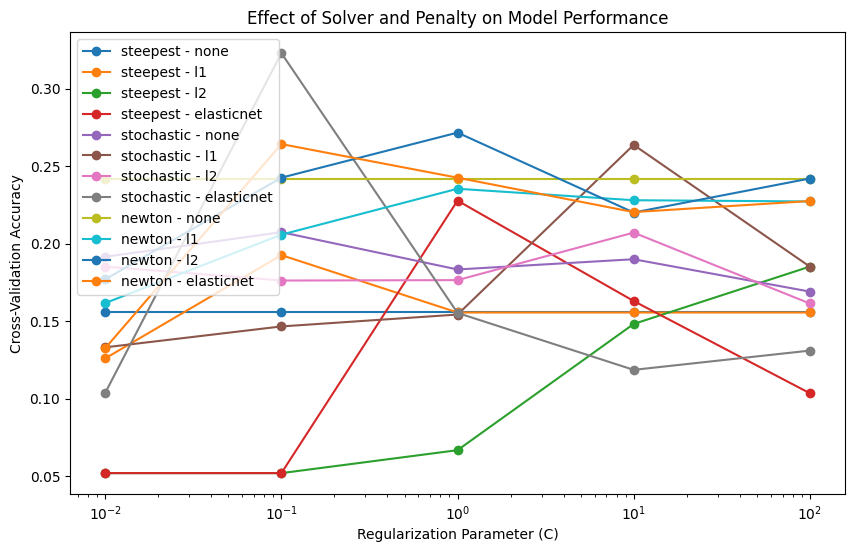

Best Parameters: {'solver': 'newton', 'penalty': 'elasticnet', 'C': 100}
Training Time:  0.29541683197021484  seconds
Test Accuracy: 0.22846153846153847


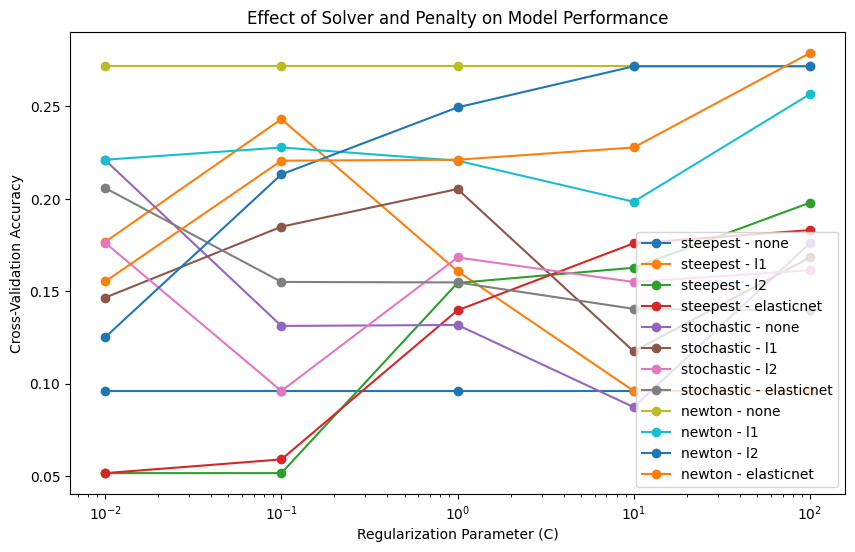

Best Parameters: {'solver': 'newton', 'penalty': 'l2', 'C': 0.1}
Training Time:  0.23518610000610352  seconds
Test Accuracy: 0.3242307692307692


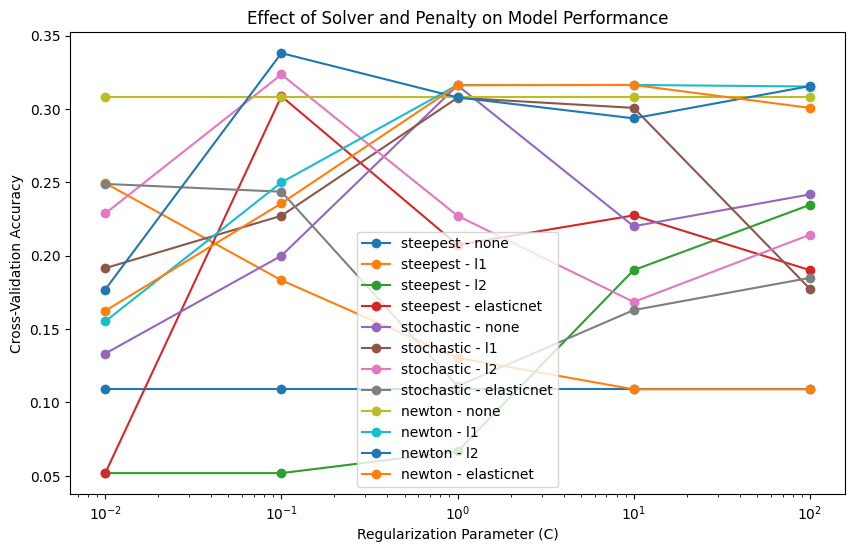

Best Parameters: {'solver': 'newton', 'penalty': 'l1', 'C': 100}
Training Time:  0.0794074535369873  seconds
Test Accuracy: 0.30846153846153845


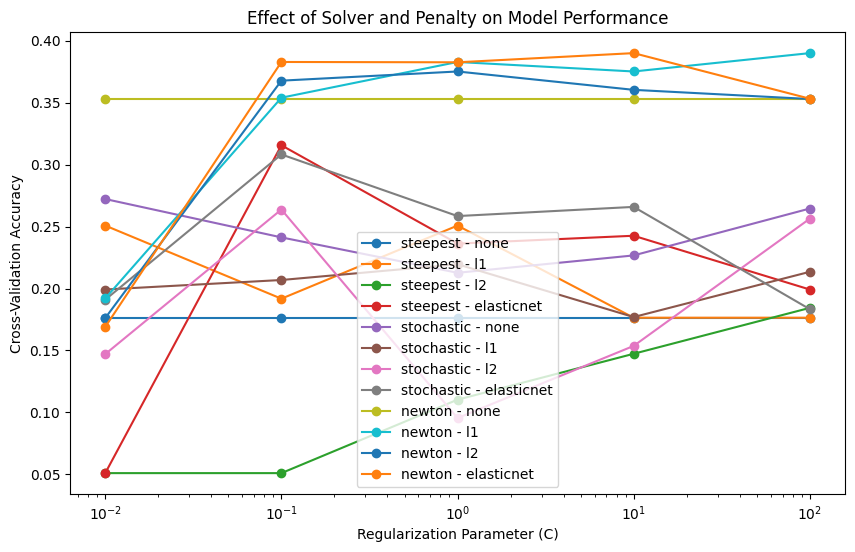

In [ ]:
# Optimize for Ship Type
shp_model, shp_time, shp_acc = optimize_logistic_regression(shp_train, shp_test, shp_y_train, shp_y_test)

# Optimize for Route Type
rte_model, rte_time, rte_acc = optimize_logistic_regression(rte_train, rte_test, rte_y_train, rte_y_test)

# Optimize for Engine Type
eng_model, eng_time, eng_acc = optimize_logistic_regression(eng_train, eng_test, eng_y_train, eng_y_test)

# Optimize for Maintenance Status
mtn_model, mtn_time, mtn_acc = optimize_logistic_regression(mtn_train, mtn_test, mtn_y_train, mtn_y_test)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore")

def compare_with_sklearn(X_train, X_test, y_train, y_test, custom_model, solvers=['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']):
    """
    Compare custom logistic regression implementation with scikit-learn.

    Parameters:
    -----------
    X_train, X_test : feature sets
    y_train, y_test : labels
    custom_model : your custom logistic regression model
    solvers : list of sklearn solvers to try
    """

    # Results storage
    results = {
        'model': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'training_time': []
    }

    # 1. Evaluate your custom model (already trained)
    start_time = time.time()
    # Assuming model is already trained
    custom_training_time = time.time() - start_time

    custom_preds = custom_model.predict(X_test)

    # Add results to dictionary
    results['model'].append('Custom (Best Parameters)')
    results['accuracy'].append(accuracy_score(y_test, custom_preds))
    results['precision'].append(precision_score(y_test, custom_preds, average='weighted'))
    results['recall'].append(recall_score(y_test, custom_preds, average='weighted'))
    results['f1'].append(f1_score(y_test, custom_preds, average='weighted'))
    results['training_time'].append(custom_training_time)

    # 2. Train and evaluate sklearn models with different solvers
    for solver in solvers:
        # Create model - adjust parameters to match your custom model's best parameters
        if solver in ['liblinear', 'saga']:
            # These solvers support both L1 and L2
            penalties = ['l1', 'l2', 'elasticnet'] if solver == 'saga' else ['l1', 'l2']
            for penalty in penalties:
                try:
                    if penalty == 'elasticnet' and solver == 'saga':
                        for l1_ratio in [0.25, 0.5, 0.75]:
                            model_name = f'sklearn ({solver}, {penalty}, l1_ratio={l1_ratio})'
                            sk_model = SklearnLogisticRegression(
                                solver=solver,
                                penalty=penalty,
                                C=custom_model.C,
                                l1_ratio=l1_ratio,
                                max_iter=1000,
                                multi_class='ovr'
                            )
                            # Train and time
                            start_time = time.time()
                            sk_model.fit(X_train, y_train)
                            training_time = time.time() - start_time

                            # Predict and evaluate
                            sk_preds = sk_model.predict(X_test)

                            # Store results
                            results['model'].append(model_name)
                            results['accuracy'].append(accuracy_score(y_test, sk_preds))
                            results['precision'].append(precision_score(y_test, sk_preds, average='weighted'))
                            results['recall'].append(recall_score(y_test, sk_preds, average='weighted'))
                            results['f1'].append(f1_score(y_test, sk_preds, average='weighted'))
                            results['training_time'].append(training_time)
                    else:
                        model_name = f'sklearn ({solver}, {penalty})'
                        sk_model = SklearnLogisticRegression(
                            solver=solver,
                            penalty=penalty,
                            C=custom_model.C,
                            max_iter=1000,
                            multi_class='ovr'
                        )
                        # Train and time
                        start_time = time.time()
                        sk_model.fit(X_train, y_train)
                        training_time = time.time() - start_time

                        # Predict and evaluate
                        sk_preds = sk_model.predict(X_test)

                        # Store results
                        results['model'].append(model_name)
                        results['accuracy'].append(accuracy_score(y_test, sk_preds))
                        results['precision'].append(precision_score(y_test, sk_preds, average='weighted'))
                        results['recall'].append(recall_score(y_test, sk_preds, average='weighted'))
                        results['f1'].append(f1_score(y_test, sk_preds, average='weighted'))
                        results['training_time'].append(training_time)
                except Exception as e:
                    print(f"Error with {solver}, {penalty}: {e}")
        else:
            # These solvers generally only support L2
            model_name = f'sklearn ({solver}, l2)'
            sk_model = SklearnLogisticRegression(
                solver=solver,
                penalty='l2',
                C=custom_model.C,
                max_iter=1000,
                multi_class='ovr'
            )

            # Train and time
            start_time = time.time()
            sk_model.fit(X_train, y_train)
            training_time = time.time() - start_time

            # Predict and evaluate
            sk_preds = sk_model.predict(X_test)

            # Store results
            results['model'].append(model_name)
            results['accuracy'].append(accuracy_score(y_test, sk_preds))
            results['precision'].append(precision_score(y_test, sk_preds, average='weighted'))
            results['recall'].append(recall_score(y_test, sk_preds, average='weighted'))
            results['f1'].append(f1_score(y_test, sk_preds, average='weighted'))
            results['training_time'].append(training_time)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Sort by accuracy
    results_df = results_df.sort_values('accuracy', ascending=False)

    # Print results
    print(results_df)

    # Display detailed comparison for best sklearn model vs. custom
    best_sklearn_model = results_df.iloc[1]['model'] if results_df.iloc[0]['model'] == 'Custom (Best Parameters)' else results_df.iloc[0]['model']
    print(f"\nDetailed comparison: Custom vs. {best_sklearn_model}")
    print(f"Accuracy difference: {results_df.iloc[0]['accuracy'] - results_df.loc[results_df['model'] == best_sklearn_model, 'accuracy'].values[0]:.4f}")
    print(f"Training time ratio: {results_df.loc[results_df['model'] == 'Custom (Best Parameters)', 'training_time'].values[0] / results_df.loc[results_df['model'] == best_sklearn_model, 'training_time'].values[0]:.2f}x")

    # Visualizations
    visualize_performance_comparison(results_df)

    return results_df

## Visualizations Comparing Custom and Sklearn's Best Implementation

In [ ]:
def visualize_performance_comparison(results_df):
    """Create visualizations comparing custom and sklearn's best implementation."""

    # Extract the custom model and find the best sklearn model
    custom_row = results_df[results_df['model'] == 'Custom (Best Parameters)']
    sklearn_models = results_df[results_df['model'] != 'Custom (Best Parameters)']

    # Find best sklearn model (highest accuracy)
    best_sklearn_row = sklearn_models.loc[sklearn_models['accuracy'].idxmax()]

    # Create a new DataFrame with just these two models
    comparison_df = pd.concat([custom_row, best_sklearn_row.to_frame().T])

    # 1. Performance Metrics Comparison
    plt.figure(figsize=(12, 6))

    metrics = ['accuracy', 'precision', 'recall', 'f1']

    # Set up the bar positions
    bar_width = 0.35
    index = np.arange(len(metrics))

    # Plot bars for the two models
    plt.bar(
        index - bar_width/2,
        [custom_row[metric].values[0] for metric in metrics],
        bar_width,
        label=custom_row['model'].values[0],
        color='blue'
    )

    plt.bar(
        index + bar_width/2,
        [best_sklearn_row[metric] for metric in metrics],
        bar_width,
        label=best_sklearn_row['model'],
        color='green'
    )

    # Add value labels on top of each bar
    for i in range(len(metrics)):
        plt.text(index[i] - bar_width/2, custom_row[metrics[i]].values[0] + 0.01,
                 f"{custom_row[metrics[i]].values[0]:.3f}",
                 ha='center', va='bottom')
        plt.text(index[i] + bar_width/2, best_sklearn_row[metrics[i]] + 0.01,
                 f"{best_sklearn_row[metrics[i]]:.3f}",
                 ha='center', va='bottom')

    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title('Performance Metrics: Custom vs Best Sklearn Model')
    plt.xticks(index, metrics)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.ylim(0, 1.1)  # Leave room for value labels
    plt.tight_layout()
    plt.show()

    # 2. Training Time Comparison
    plt.figure(figsize=(8, 5))
    models = [custom_row['model'].values[0], best_sklearn_row['model']]
    times = [custom_row['training_time'].values[0], best_sklearn_row['training_time']]

    colors = ['blue', 'green']
    bars = plt.bar(models, times, color=colors)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                 f"{height:.4f}s", ha='center', va='bottom')

    plt.xlabel('Model')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. Side-by-side comparison table
    print("\n--- Custom vs Best Sklearn Model Comparison ---")
    diff_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'Training Time'],
        'Custom': [
            custom_row['accuracy'].values[0],
            custom_row['precision'].values[0],
            custom_row['recall'].values[0],
            custom_row['f1'].values[0],
            custom_row['training_time'].values[0]
        ],
        'Best Sklearn': [
            best_sklearn_row['accuracy'],
            best_sklearn_row['precision'],
            best_sklearn_row['recall'],
            best_sklearn_row['f1'],
            best_sklearn_row['training_time']
        ]
    })

    # Calculate differences and ratios
    diff_df['Absolute Difference'] = diff_df['Custom'] - diff_df['Best Sklearn']
    diff_df['Ratio (Custom/Sklearn)'] = diff_df['Custom'] / diff_df['Best Sklearn']

    # Format nicely
    for col in ['Custom', 'Best Sklearn', 'Absolute Difference']:
        diff_df[col] = diff_df[col].apply(lambda x: f"{x:.5f}")
    diff_df['Ratio (Custom/Sklearn)'] = diff_df['Ratio (Custom/Sklearn)'].apply(lambda x: f"{x:.2f}x")

    print(diff_df.to_string(index=False))

    # Optional: summary statement
    acc_diff = float(diff_df.loc[diff_df['Metric'] == 'Accuracy', 'Absolute Difference'].values[0])
    time_ratio = float(diff_df.loc[diff_df['Metric'] == 'Training Time', 'Ratio (Custom/Sklearn)'].values[0].replace('x', ''))

    print("\nSummary:")
    print(f"Your custom model is {abs(acc_diff):.5f} {'better' if acc_diff > 0 else 'worse'} in accuracy")
    print(f"and {time_ratio:.2f}x {'slower' if time_ratio > 1 else 'faster'} than the best sklearn model.")

In [ ]:
def compare_custom_vs_sklearn(X_train, X_test, y_train, y_test, custom_model, custom_training_time=None):
    """
    Compare custom logistic regression implementation with scikit-learn.

    Parameters:
    -----------
    X_train, X_test : feature sets
    y_train, y_test : labels
    custom_model : your custom logistic regression model
    custom_training_time : manually specify the training time for your custom model
    """

    # Results storage
    results = {
        'model': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'training_time': []
    }

    # 1. Evaluate your custom model (already trained)
    if custom_training_time is None:
        custom_training_time = 0  # If not provided, will show as 0

    custom_preds = custom_model.predict(X_test)

    # Add results to dictionary
    results['model'].append('Custom (Best Parameters)')
    results['accuracy'].append(accuracy_score(y_test, custom_preds))
    results['precision'].append(precision_score(y_test, custom_preds, average='weighted'))
    results['recall'].append(recall_score(y_test, custom_preds, average='weighted'))
    results['f1'].append(f1_score(y_test, custom_preds, average='weighted'))
    results['training_time'].append(custom_training_time)

    # 2. Train and evaluate sklearn models with different solvers
    solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']

    for solver in solvers:
        # Create model - adjust parameters to match your custom model's best parameters
        if solver in ['liblinear', 'saga']:
            # These solvers support both L1 and L2
            penalties = ['l1', 'l2', 'elasticnet'] if solver == 'saga' else ['l1', 'l2']
            for penalty in penalties:
                try:
                    if penalty == 'elasticnet' and solver == 'saga':
                        for l1_ratio in [0.25, 0.5, 0.75]:
                            model_name = f'sklearn ({solver}, {penalty}, l1_ratio={l1_ratio})'
                            sk_model = SklearnLogisticRegression(
                                solver=solver,
                                penalty=penalty,
                                C=custom_model.C,
                                l1_ratio=l1_ratio,
                                max_iter=1000,
                                multi_class='ovr'
                            )
                            # Train and time
                            start_time = time.time()
                            sk_model.fit(X_train, y_train)
                            training_time = time.time() - start_time

                            # Predict and evaluate
                            sk_preds = sk_model.predict(X_test)

                            # Store results
                            results['model'].append(model_name)
                            results['accuracy'].append(accuracy_score(y_test, sk_preds))
                            results['precision'].append(precision_score(y_test, sk_preds, average='weighted'))
                            results['recall'].append(recall_score(y_test, sk_preds, average='weighted'))
                            results['f1'].append(f1_score(y_test, sk_preds, average='weighted'))
                            results['training_time'].append(training_time)
                    else:
                        model_name = f'sklearn ({solver}, {penalty})'
                        sk_model = SklearnLogisticRegression(
                            solver=solver,
                            penalty=penalty,
                            C=custom_model.C,
                            max_iter=1000,
                            multi_class='ovr'
                        )
                        # Train and time
                        start_time = time.time()
                        sk_model.fit(X_train, y_train)
                        training_time = time.time() - start_time

                        # Predict and evaluate
                        sk_preds = sk_model.predict(X_test)

                        # Store results
                        results['model'].append(model_name)
                        results['accuracy'].append(accuracy_score(y_test, sk_preds))
                        results['precision'].append(precision_score(y_test, sk_preds, average='weighted'))
                        results['recall'].append(recall_score(y_test, sk_preds, average='weighted'))
                        results['f1'].append(f1_score(y_test, sk_preds, average='weighted'))
                        results['training_time'].append(training_time)
                except Exception as e:
                    print(f"Error with {solver}, {penalty}: {e}")
        else:
            # These solvers generally only support L2
            model_name = f'sklearn ({solver}, l2)'
            sk_model = SklearnLogisticRegression(
                solver=solver,
                penalty='l2',
                C=custom_model.C,
                max_iter=1000,
                multi_class='ovr'
            )

            # Train and time
            start_time = time.time()
            sk_model.fit(X_train, y_train)
            training_time = time.time() - start_time

            # Predict and evaluate
            sk_preds = sk_model.predict(X_test)

            # Store results
            results['model'].append(model_name)
            results['accuracy'].append(accuracy_score(y_test, sk_preds))
            results['precision'].append(precision_score(y_test, sk_preds, average='weighted'))
            results['recall'].append(recall_score(y_test, sk_preds, average='weighted'))
            results['f1'].append(f1_score(y_test, sk_preds, average='weighted'))
            results['training_time'].append(training_time)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Sort by accuracy
    results_df = results_df.sort_values('accuracy', ascending=False)

    # Print all results
    print("\nAll models sorted by accuracy:")
    print(results_df[['model', 'accuracy', 'training_time']])

    # Visualize only the custom vs best sklearn
    visualize_performance_comparison(results_df)

    return results_df

### Ship Type Results


All models sorted by accuracy:
                                        model  accuracy  training_time
3                         sklearn (lbfgs, l2)  0.250000       0.504710
1                     sklearn (liblinear, l1)  0.243846       0.003694
4                     sklearn (newton-cg, l2)  0.243462       0.723911
2                     sklearn (liblinear, l2)  0.240385       0.005748
6                          sklearn (saga, l1)  0.233077       0.200632
7                          sklearn (saga, l2)  0.233077       0.170644
8   sklearn (saga, elasticnet, l1_ratio=0.25)  0.233077       0.217953
9    sklearn (saga, elasticnet, l1_ratio=0.5)  0.232692       0.205857
10  sklearn (saga, elasticnet, l1_ratio=0.75)  0.232692       0.203824
0                    Custom (Best Parameters)  0.231923       0.605639
5                           sklearn (sag, l2)  0.228077       0.145185


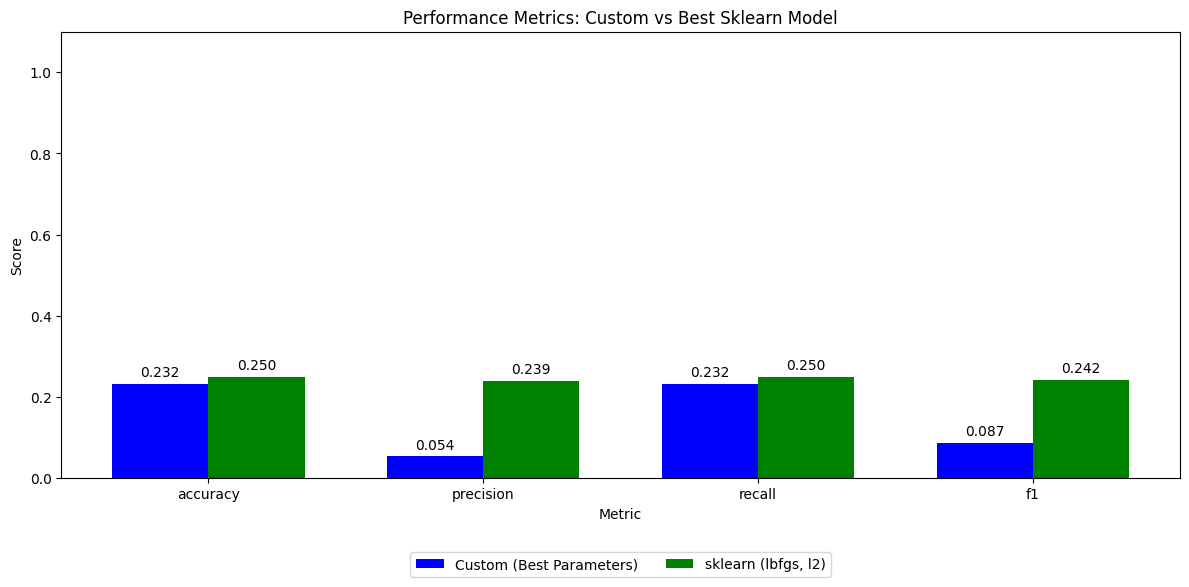

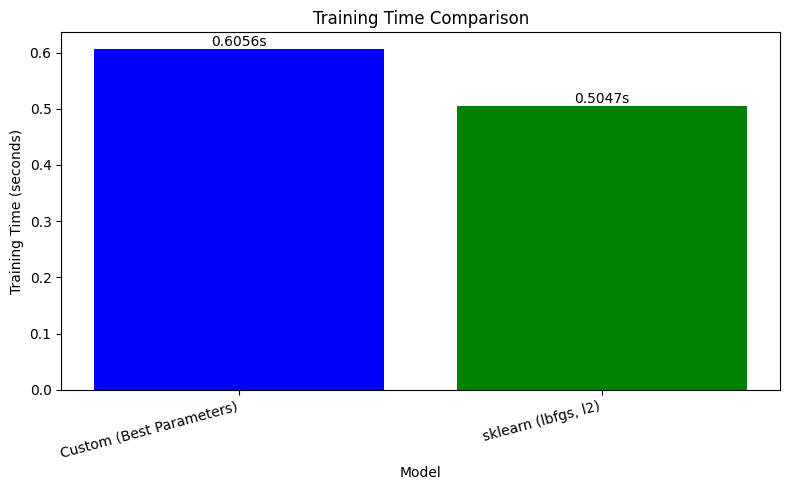


--- Custom vs Best Sklearn Model Comparison ---
       Metric  Custom Best Sklearn Absolute Difference Ratio (Custom/Sklearn)
     Accuracy 0.23192      0.25000            -0.01808                  0.93x
    Precision 0.05379      0.23933            -0.18554                  0.22x
       Recall 0.23192      0.25000            -0.01808                  0.93x
           F1 0.08732      0.24200            -0.15468                  0.36x
Training Time 0.60564      0.50471             0.10093                  1.20x

Summary:
Your custom model is 0.01808 worse in accuracy
and 1.20x slower than the best sklearn model.


In [ ]:
shp_results = compare_custom_vs_sklearn(shp_train, shp_test, shp_y_train, shp_y_test, shp_model, shp_time)

### Route Type Results


All models sorted by accuracy:
                                        model  accuracy  training_time
5                           sklearn (sag, l2)  0.243077       0.160427
6                          sklearn (saga, l1)  0.240385       0.208596
7                          sklearn (saga, l2)  0.240385       0.171887
8   sklearn (saga, elasticnet, l1_ratio=0.25)  0.240385       0.205814
9    sklearn (saga, elasticnet, l1_ratio=0.5)  0.240385       0.207905
10  sklearn (saga, elasticnet, l1_ratio=0.75)  0.240385       0.220391
2                     sklearn (liblinear, l2)  0.238077       0.003668
0                    Custom (Best Parameters)  0.228462       0.295417
1                     sklearn (liblinear, l1)  0.225769       0.006146
3                         sklearn (lbfgs, l2)  0.225000       0.568933
4                     sklearn (newton-cg, l2)  0.224615       0.743107


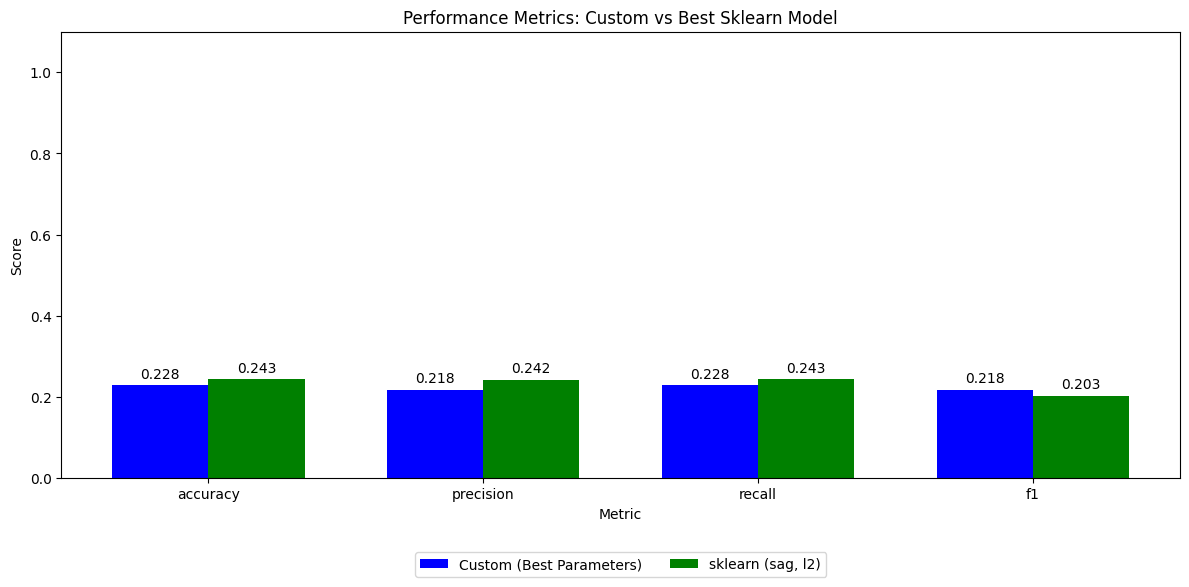

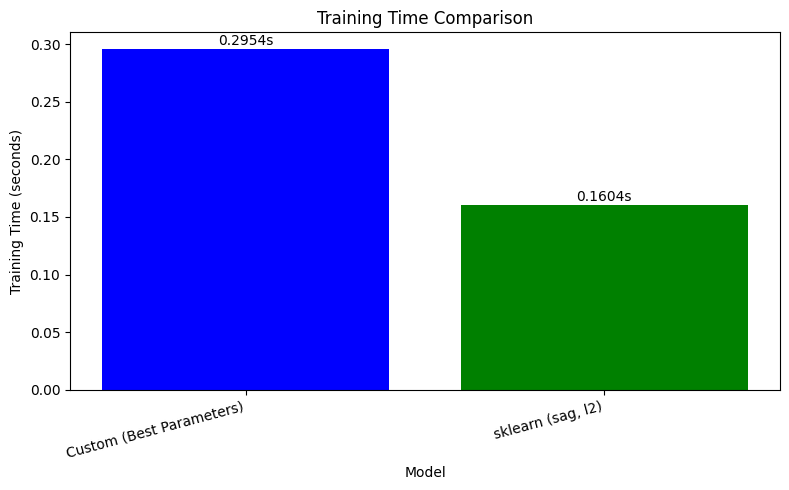


--- Custom vs Best Sklearn Model Comparison ---
       Metric  Custom Best Sklearn Absolute Difference Ratio (Custom/Sklearn)
     Accuracy 0.22846      0.24308            -0.01462                  0.94x
    Precision 0.21796      0.24175            -0.02379                  0.90x
       Recall 0.22846      0.24308            -0.01462                  0.94x
           F1 0.21774      0.20317             0.01457                  1.07x
Training Time 0.29542      0.16043             0.13499                  1.84x

Summary:
Your custom model is 0.01462 worse in accuracy
and 1.84x slower than the best sklearn model.


In [ ]:
rte_results = compare_custom_vs_sklearn(rte_train, rte_test, rte_y_train, rte_y_test, rte_model, rte_time)

### Engine Type Results


All models sorted by accuracy:
                                        model  accuracy  training_time
3                         sklearn (lbfgs, l2)  0.332692       0.481531
4                     sklearn (newton-cg, l2)  0.329231       0.521404
0                    Custom (Best Parameters)  0.324231       0.235186
1                     sklearn (liblinear, l1)  0.320769       0.003333
2                     sklearn (liblinear, l2)  0.318077       0.003123
10  sklearn (saga, elasticnet, l1_ratio=0.75)  0.314231       0.161462
6                          sklearn (saga, l1)  0.313846       0.163648
7                          sklearn (saga, l2)  0.313846       0.136436
8   sklearn (saga, elasticnet, l1_ratio=0.25)  0.313846       0.163021
9    sklearn (saga, elasticnet, l1_ratio=0.5)  0.313846       0.167190
5                           sklearn (sag, l2)  0.313462       0.129208


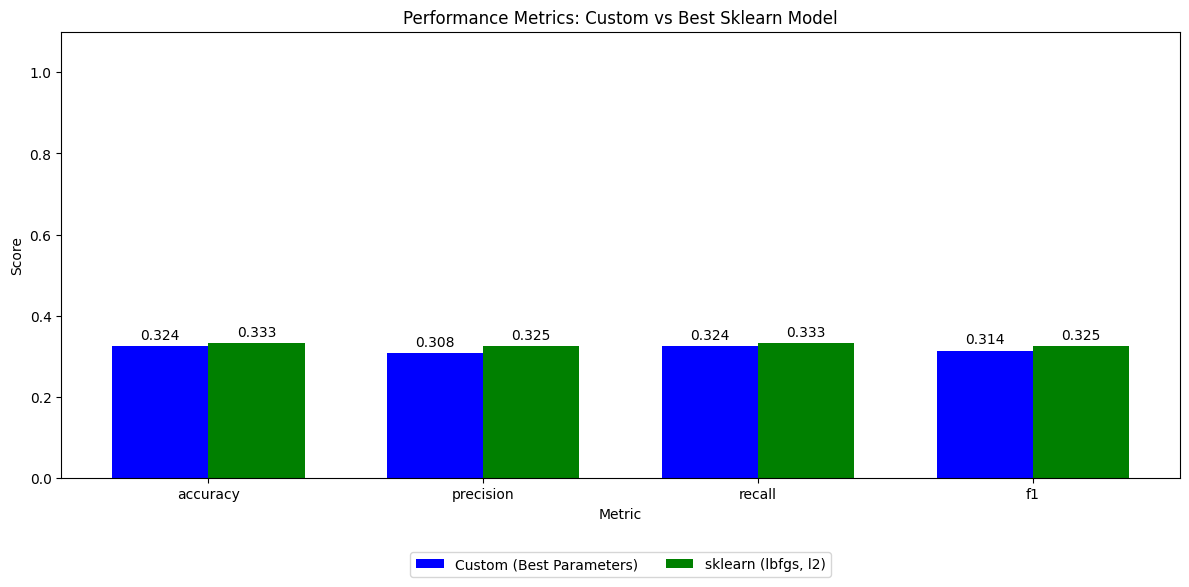

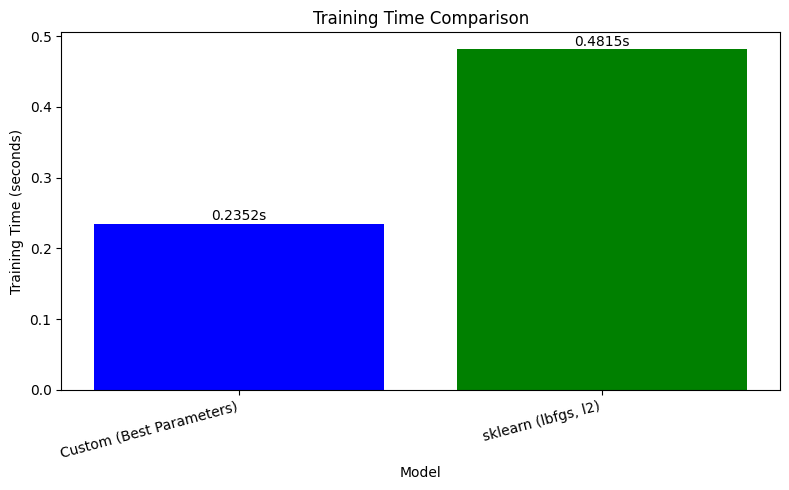


--- Custom vs Best Sklearn Model Comparison ---
       Metric  Custom Best Sklearn Absolute Difference Ratio (Custom/Sklearn)
     Accuracy 0.32423      0.33269            -0.00846                  0.97x
    Precision 0.30753      0.32483            -0.01729                  0.95x
       Recall 0.32423      0.33269            -0.00846                  0.97x
           F1 0.31354      0.32488            -0.01134                  0.97x
Training Time 0.23519      0.48153            -0.24635                  0.49x

Summary:
Your custom model is 0.00846 worse in accuracy
and 0.49x faster than the best sklearn model.


In [ ]:
eng_results = compare_custom_vs_sklearn(eng_train, eng_test, eng_y_train, eng_y_test, eng_model, eng_time)

### Maintanence Status Results


All models sorted by accuracy:
                                        model  accuracy  training_time
5                           sklearn (sag, l2)  0.322308       0.130884
6                          sklearn (saga, l1)  0.319231       0.166459
7                          sklearn (saga, l2)  0.319231       0.141539
8   sklearn (saga, elasticnet, l1_ratio=0.25)  0.319231       0.167910
9    sklearn (saga, elasticnet, l1_ratio=0.5)  0.319231       0.166631
10  sklearn (saga, elasticnet, l1_ratio=0.75)  0.319231       0.163275
2                     sklearn (liblinear, l2)  0.313846       0.004836
0                    Custom (Best Parameters)  0.308462       0.079407
4                     sklearn (newton-cg, l2)  0.304231       0.555749
1                     sklearn (liblinear, l1)  0.302692       0.005429
3                         sklearn (lbfgs, l2)  0.302692       0.408573


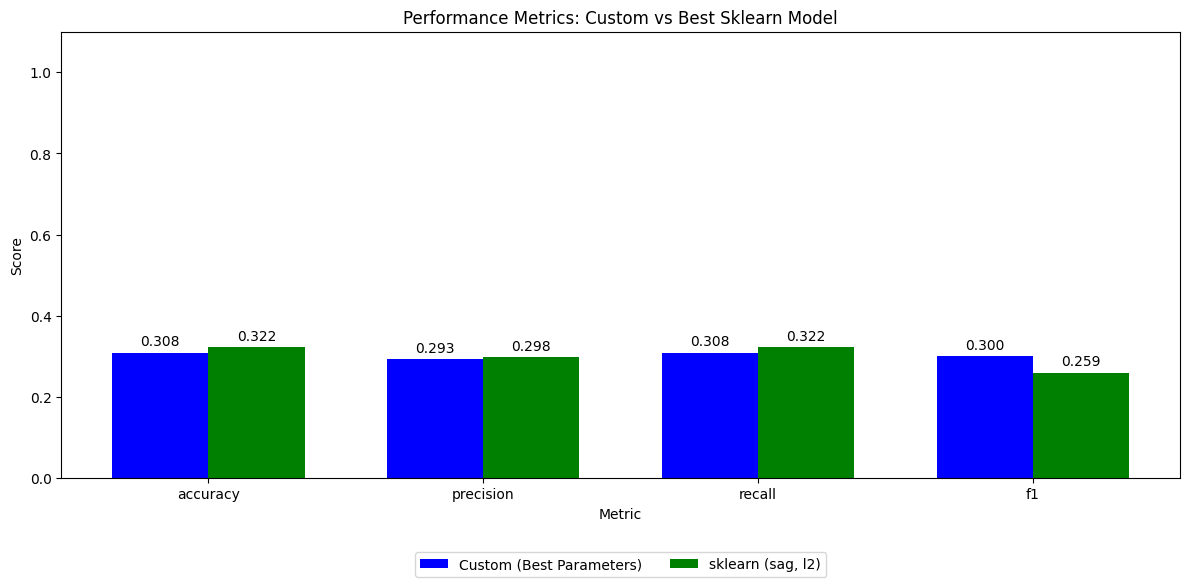

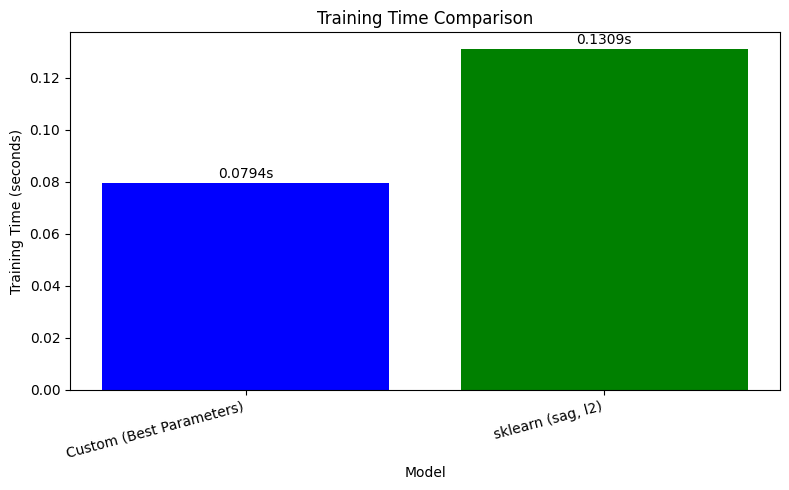


--- Custom vs Best Sklearn Model Comparison ---
       Metric  Custom Best Sklearn Absolute Difference Ratio (Custom/Sklearn)
     Accuracy 0.30846      0.32231            -0.01385                  0.96x
    Precision 0.29342      0.29835            -0.00492                  0.98x
       Recall 0.30846      0.32231            -0.01385                  0.96x
           F1 0.30043      0.25934             0.04109                  1.16x
Training Time 0.07941      0.13088            -0.05148                  0.61x

Summary:
Your custom model is 0.01385 worse in accuracy
and 0.61x faster than the best sklearn model.


In [ ]:
mtn_results = compare_custom_vs_sklearn(mtn_train, mtn_test, mtn_y_train, mtn_y_test, mtn_model, mtn_time)

Keep in mind that the highest accuracy possible is dependent on how many variables we have. Ship Type has four variables, so since it is a one versus all, the highest (100%) accuracy is going to be 0.25, whereas for engine type, it is only three options, so the highest possible accuracy is 0.33.


#Deployment

#Exceptional Work